In [8]:
pip install rebound

In [9]:
# Se procede a importar las librerías y recursos que se utilizarán para llevar a cabo el proyecto.
# Como se puede ver, basta con las tres librerías fundamentales que son numpy para los arreglos numéricos, matplotlib para los plots y
# rebound para hacer toda la parte astrofísica.

import numpy as np
import matplotlib.pyplot as plt
import rebound
from matplotlib.animation import FuncAnimation
from IPython.display import set_matplotlib_formats

In [10]:
# 1.- Definiendo la simulación y sus características.

# Se crea una nueva simulación.
sim1 = rebound.Simulation()
# La simulación posee unidades de 'unidad astronómica', 'año luz' y 'masas solares'
sim1.units = ('AU', 'yr', 'Msun')

In [11]:
# 2. Se agregan los cuerpos celestes que se utlizarán.

sim1.add('Sun')
sim1.add('399') # --> Tierra
sim1.add('301') # --> Luna

# Se desplaza el sistema al centro de masa conformado por estos tres cuerpos en conjunto.
sim1.move_to_com()

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for '399'... 
Found: Earth (399) 
Searching NASA Horizons for '301'... 
Found: Moon (301) 


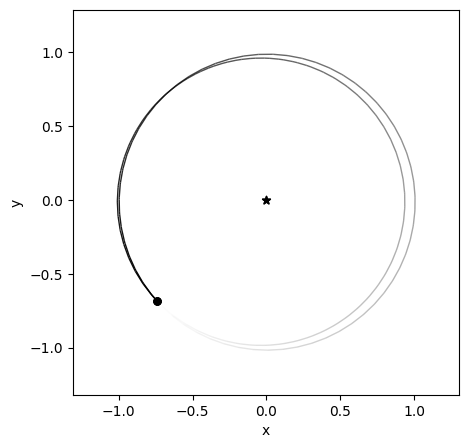

In [12]:
# 3. Se grafica el sistema para ver cómo está por ahora.

fig1 = rebound.OrbitPlot(sim1)

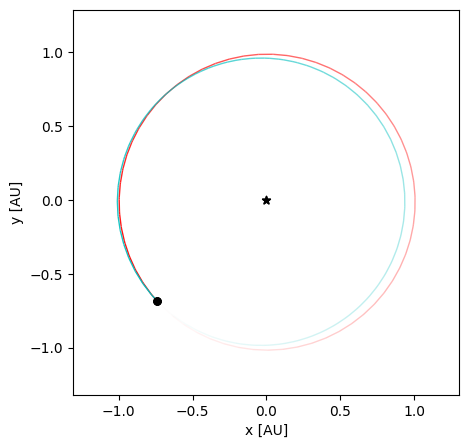

In [13]:
fig = rebound.OrbitPlot(sim1, unitlabel="[AU]", color=True)

In [18]:
# 4.- Se crea una función que se encarga de calcular el área formada por los vectores.

def area_triangulo(v1, v2):
    return np.linalg.norm(np.cross(v1, v2))

tolerancia = 1.5e-5

# Integra la simulación un año completo, dividiendo cada parte en un millón de datos equivistantes entre cada uno y los extremos.
fecha = np.linspace(0, 1, 1000000)  # Tiempo de integración de 0 a 1 año, 10e6 pasos
fechas_eclipses = []
areas = []

for t in fecha:
    sim1.integrate(t)
    pos_sol = np.array([sim1.particles[0].x, sim1.particles[0].y, sim1.particles[0].z])
    pos_tierra = np.array([sim1.particles[1].x, sim1.particles[1].y, sim1.particles[1].z])
    pos_luna = np.array([sim1.particles[2].x, sim1.particles[2].y, sim1.particles[2].z])

    # Calcular los vectores que unen los cuerpos
    vector_tierra_sol = pos_sol - pos_tierra
    vector_tierra_luna = pos_luna - pos_tierra

    # Calcular el área formada por los tres vectores llevando los vectores a la función definida anteriormente.
    area = area_triangulo(vector_tierra_sol, vector_tierra_luna)

    # Si el área es cercana es menor a al tolerancia que es un valor muy pequeño, consideramos que hay un eclipse.
    if abs(area) < tolerancia:
        fechas_eclipses.append(t)
    areas.append(area)

fechas_eclipses


[0.4179574179574179,
 0.4179584179584179,
 0.41795941795941793,
 0.41796041796041794,
 0.41796141796141795,
 0.4179624179624179,
 0.4179634179634179,
 0.4179644179644179,
 0.4179654179654179,
 0.4179664179664179,
 0.41796741796741793,
 0.41796841796841794,
 0.41796941796941794,
 0.8628768628768628,
 0.8628778628778628,
 0.8628788628788628,
 0.8628798628798628,
 0.8628808628808627,
 0.8628818628818627,
 0.8628828628828628,
 0.8628838628838628,
 0.8628848628848628,
 0.8628858628858628,
 0.8628868628868628,
 0.8628878628878628,
 0.8628888628888628,
 0.8628898628898628,
 0.8628908628908628,
 0.8628918628918628,
 0.8628928628928628,
 0.8628938628938628,
 0.8628948628948628,
 0.8628958628958628,
 0.8628968628968628,
 0.8628978628978629,
 0.8628988628988629,
 0.8628998628998629,
 0.8629008629008628,
 0.8629018629018628,
 0.8629028629028628,
 0.8629038629038628]

In [51]:
import datetime
# Convertir los tiempos de años a fechas

fecha_actual = datetime.datetime.today()  # Fecha inicial es la del día de hoy
fechas_eclipse = [fecha_actual + datetime.timedelta(days=t * 365.25) for t in fechas_eclipses]

print("Fechas de eclipse:")
for date in fechas_eclipse:
    print(date.strftime("%Y-%m-%d"))

[datetime.datetime(2024, 10, 2, 19, 39, 46, 909363), datetime.datetime(2024, 10, 2, 19, 40, 18, 466995), datetime.datetime(2024, 10, 2, 19, 40, 50, 24626), datetime.datetime(2024, 10, 2, 19, 41, 21, 582258), datetime.datetime(2024, 10, 2, 19, 41, 53, 139889), datetime.datetime(2024, 10, 2, 19, 42, 24, 697521), datetime.datetime(2024, 10, 2, 19, 42, 56, 255152), datetime.datetime(2024, 10, 2, 19, 43, 27, 812784), datetime.datetime(2024, 10, 2, 19, 43, 59, 370415), datetime.datetime(2024, 10, 2, 19, 44, 30, 928047), datetime.datetime(2024, 10, 2, 19, 45, 2, 485679), datetime.datetime(2024, 10, 2, 19, 45, 34, 43310), datetime.datetime(2024, 10, 2, 19, 46, 5, 600942), datetime.datetime(2025, 3, 14, 7, 49, 36, 784353), datetime.datetime(2025, 3, 14, 7, 50, 8, 341984), datetime.datetime(2025, 3, 14, 7, 50, 39, 899616), datetime.datetime(2025, 3, 14, 7, 51, 11, 457248), datetime.datetime(2025, 3, 14, 7, 51, 43, 14879), datetime.datetime(2025, 3, 14, 7, 52, 14, 572511), datetime.datetime(2025,

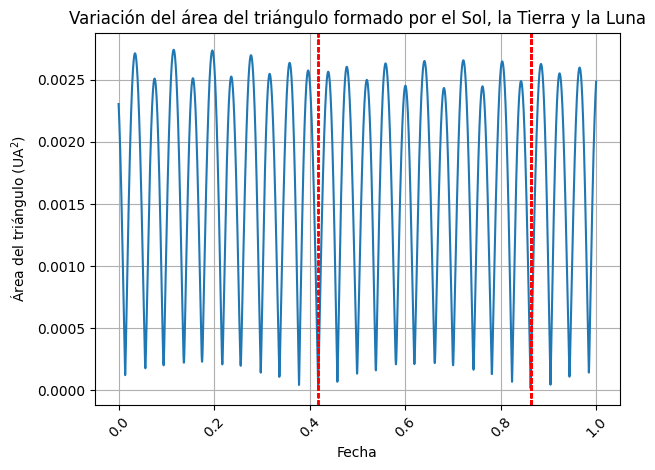

In [55]:
# 5.- Por último, como añadidura se grafica cómo varía el área en función del tiempo
plt.plot(fecha, areas)
plt.xlabel('Fecha')
plt.ylabel('Área del triángulo (UA$^2$)')
plt.title('Variación del área del triángulo formado por el Sol, la Tierra y la Luna')
plt.xticks(rotation=45)
plt.grid(True)

# Agregar líneas verticales en los tiempos de eclipses
for fecha_eclipse in fechas_eclipses:
    plt.axvline(x=fecha_eclipse, color='r', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()